In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import datetime
import matplotlib.pyplot as plt
import math

In [2]:
mining_companies = ["ALB", "LAC", "SQM"]
battery_companies = ["CBAT", "ENS", "TIA"]

mining_headers = [x + "_Min" for x in mining_companies]
battery_headers = [x + "_Bat" for x in battery_companies]

price_col = "Close"
date_col = "Date"

battery_data_file_format = "StockData/battery_manufacturers/stationary/{symbol}_bat__stationary_close.csv"
mining_data_file_format = "StockData/mining/stationary/{symbol}_min__stationary_close.csv"

num_days = 3000
start_date = datetime.datetime.strptime("01/01/2015", "%d/%m/%Y")
date_list = [start_date + datetime.timedelta(days=x) for x in range(num_days)]

In [3]:
raw_df = pd.read_csv("StockData/main_ds_nlp_weather.csv")
raw_df[date_col] = raw_df[date_col].apply(
    (lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
) # convert dates to datetime objects

In [4]:
sentiment_suffix = "_sentiment_TextBlob"
sentiment_df = raw_df[[date_col, *[x for x in raw_df.columns if sentiment_suffix in x]]]
sentiment_df = sentiment_df.rename(columns = {f"CBAK{sentiment_suffix}": f"CBAT{sentiment_suffix}"})

In [5]:
weather_suffix = "_1_conditions"
weather_df = raw_df[[date_col, *[x for x in raw_df.columns if weather_suffix in x]]]
weather_df = weather_df.rename(columns = {f"CBAK{weather_suffix}": f"CBAT{weather_suffix}"})

In [6]:
blank_df_generator = ((date_) for date_ in date_list)

In [7]:
stock_df = pd.DataFrame(blank_df_generator, columns=[date_col])

# Load all Battery Manufacturer's data
for battery_company, battery_header in zip(battery_companies, battery_headers):
    print(battery_data_file_format.format(symbol = battery_company), battery_header)
    temp_df = pd.read_csv(battery_data_file_format.format(symbol = battery_company))
    temp_df.drop(temp_df.columns.difference([date_col, price_col]), 1, inplace=True) # drop other columns
    temp_df[date_col] = temp_df[date_col].apply((lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))) # convert dates to datetiem objects
    stock_df = stock_df.merge(temp_df, on=date_col, how='outer') # join
    stock_df = stock_df.rename(columns = {"Close": battery_header})

# # Load all Mining Company's data
for mining_company, mining_header in zip(mining_companies, mining_headers):
    print(battery_data_file_format.format(symbol = mining_company), mining_header)
    temp_df = pd.read_csv(mining_data_file_format.format(symbol = mining_company))
    temp_df.drop(temp_df.columns.difference([date_col, price_col]), 1, inplace=True) # drop other columns
    temp_df[date_col] = temp_df[date_col].apply((lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))) # convert dates to datetiem objects
    stock_df = stock_df.merge(temp_df, on=date_col, how='outer') # join
    stock_df = stock_df.rename(columns = {"Close": mining_header})

StockData/battery_manufacturers/stationary/CBAT_bat__stationary_close.csv CBAT_Bat
StockData/battery_manufacturers/stationary/ENS_bat__stationary_close.csv ENS_Bat
StockData/battery_manufacturers/stationary/TIA_bat__stationary_close.csv TIA_Bat
StockData/battery_manufacturers/stationary/ALB_bat__stationary_close.csv ALB_Min
StockData/battery_manufacturers/stationary/LAC_bat__stationary_close.csv LAC_Min
StockData/battery_manufacturers/stationary/SQM_bat__stationary_close.csv SQM_Min


/var/folders/cq/fj8rt2fd4nlfxk_h0rvdd28w0000gn/T/ipykernel_57433/1510135623.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  temp_df.drop(temp_df.columns.difference([date_col, price_col]), 1, inplace=True) # drop other columns
/var/folders/cq/fj8rt2fd4nlfxk_h0rvdd28w0000gn/T/ipykernel_57433/1510135623.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  temp_df.drop(temp_df.columns.difference([date_col, price_col]), 1, inplace=True) # drop other columns


In [8]:
final_df = stock_df.merge(sentiment_df, on=date_col, how='outer')
final_df = final_df.merge(weather_df, on=date_col, how='outer')
final_df = final_df.dropna()
final_df.reset_index(inplace=True)

In [9]:
final_df.head()

,index,Date,CBAT_Bat,ENS_Bat,TIA_Bat,ALB_Min,LAC_Min,SQM_Min,ALB_sentiment_TextBlob,CBAT_sentiment_TextBlob,ENS_sentiment_TextBlob,LAC_sentiment_TextBlob,SQM_sentiment_TextBlob,TIA_sentiment_TextBlob,lithium_sentiment_TextBlob,ALB_1_conditions,LAC_1_conditions,SQM_1_conditions
0,4,2015-01-05,1.80,60.000000,8.283043,58.310001,2.35,23.242455,0.000,0.0,0.136364,0.0,0.0,0.0,0.000000,0.0,2.0,1.0
1,5,2015-01-06,1.75,58.500000,8.448862,57.169998,2.40,22.911392,0.175,0.0,0.000000,0.0,0.2,0.0,0.200000,0.0,2.0,2.0
2,6,2015-01-07,1.79,59.029999,8.444914,56.939999,2.45,22.901655,0.000,0.0,0.000000,0.0,0.2,0.0,0.000000,0.0,5.0,2.0
3,7,2015-01-08,1.96,60.410000,8.375823,58.730000,2.40,22.833496,0.000,0.0,0.000000,0.0,0.0,0.0,0.083333,0.0,5.0,2.0
4,8,2015-01-09,1.95,60.240002,8.419251,59.020000,2.45,23.300877,0.000,0.0,0.000000,0.0,0.0,0.0,0.000000,2.0,2.0,2.0


### Cross-correlation

In [10]:
import statsmodels.api as sm

In [11]:
def calculate_days_delta(date_series, num_lag_rows):
    first_date = date_series[0]
    second_date = date_series[num_lag_rows]
    delta = second_date - first_date
    return delta.days

ALB, CBAT: Highest correlation at a lag of 495 days.
LAC, CBAT: Highest correlation at a lag of 613 days.
SQM, CBAT: Highest correlation at a lag of 595 days.
ALB, ENS: Highest correlation at a lag of 0 days.
LAC, ENS: Highest correlation at a lag of 166 days.
SQM, ENS: Highest correlation at a lag of 0 days.
ALB, TIA: Highest correlation at a lag of 0 days.
LAC, TIA: Highest correlation at a lag of 45 days.
SQM, TIA: Highest correlation at a lag of 42 days.


<Figure size 432x288 with 0 Axes>

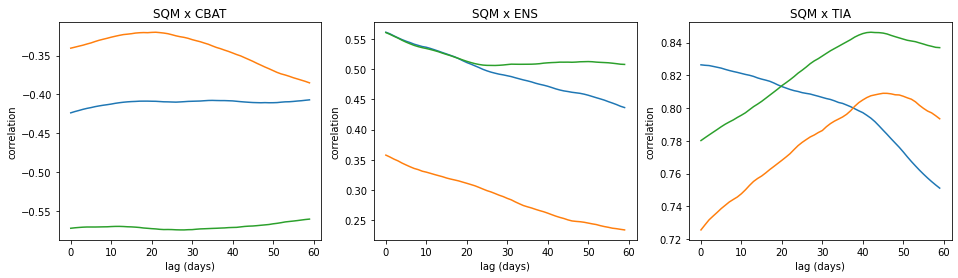

<Figure size 432x288 with 0 Axes>

In [12]:
# Cross correlation between stock prices of battery manufacturers and mining companies

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))

for idx, (battery_company, battery_header) in enumerate(zip(battery_companies, battery_headers)):
    battery_company_array = final_df[battery_header].to_numpy()
    plt.figure(idx)
    
    for mining_company, mining_header in zip(mining_companies, mining_headers):
        mining_company_array = final_df[mining_header].to_numpy()
        
        result = sm.tsa.stattools.ccf(mining_company_array, battery_company_array, adjusted=False)

        day_lags = [calculate_days_delta(stock_df["Date"], i) for i in range(len(result))]
        num_lag_rows = np.argmax(result)
        num_lag_days = day_lags[num_lag_rows]

        print(f"{mining_company}, {battery_company}: Highest correlation at a lag of {num_lag_days} days.")

        ax = sns.lineplot(x=day_lags[0:60], y=result[0:60], ax=axs[idx])
        ax.set(ylabel='correlation', xlabel='lag (days)', title=f'{mining_company} x {battery_company}')

CBAT Highest correlation at a lag of 233 days.
ENS Highest correlation at a lag of 543 days.
TIA Highest correlation at a lag of 0 days.


<Figure size 432x288 with 0 Axes>

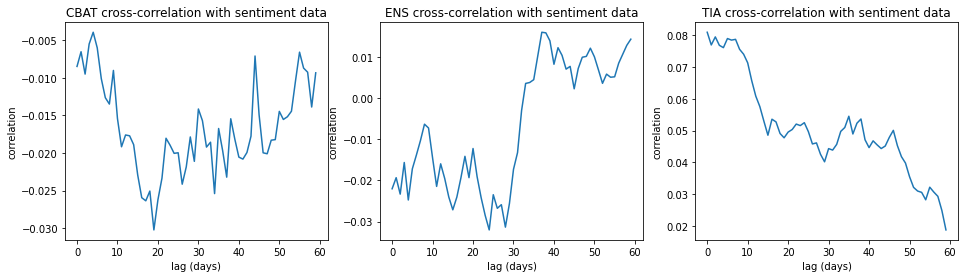

<Figure size 432x288 with 0 Axes>

In [13]:
# Cross-correlation between battery manufacturers and sentiments

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))

for idx, (battery_company, battery_header) in enumerate(zip(battery_companies, battery_headers)):
    battery_company_sentiment_header = f'{battery_company}{sentiment_suffix}'
    stock_prices = final_df[battery_header].to_numpy()
    
    sentiment_scores = final_df[battery_company_sentiment_header].to_numpy()
    
    result = sm.tsa.stattools.ccf(stock_prices, sentiment_scores, adjusted=False)

    day_lags = [calculate_days_delta(stock_df["Date"], i) for i in range(len(result))]

    num_lag_rows = np.argmax(result)
    num_lag_days = day_lags[num_lag_rows]

    print(f"{battery_company} Highest correlation at a lag of {num_lag_days} days.")

    plt.figure(idx)
    ax = sns.lineplot(x=day_lags[0:60], y=result[0:60], ax=axs[idx])
    ax.set(ylabel='correlation', xlabel='lag (days)', title=f'{battery_company} cross-correlation with sentiment data')

TIA Highest correlation at a lag of 428 days.
TIA Highest correlation at a lag of 653 days.
TIA Highest correlation at a lag of 12 days.


<Figure size 432x288 with 0 Axes>

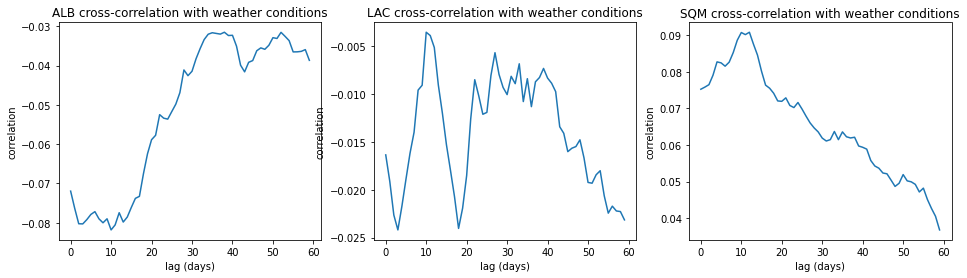

<Figure size 432x288 with 0 Axes>

In [14]:
# Cross-correlation between battery manufacturers and weather conditions

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))

for idx, (mining_company, mining_header) in enumerate(zip(mining_companies, mining_headers)):
    mining_company_sentiment_header = f'{mining_company}{weather_suffix}'
    stock_prices = final_df[mining_header].to_numpy()
    
    sentiment_scores = final_df[mining_company_sentiment_header].to_numpy()
    
    result = sm.tsa.stattools.ccf(stock_prices, sentiment_scores, adjusted=False)

    day_lags = [calculate_days_delta(stock_df["Date"], i) for i in range(len(result))]

    num_lag_rows = np.argmax(result)
    num_lag_days = day_lags[num_lag_rows]

    print(f"{battery_company} Highest correlation at a lag of {num_lag_days} days.")

    plt.figure(idx)
    ax = sns.lineplot(x=day_lags[0:60], y=result[0:60], ax=axs[idx])
    ax.set(ylabel='correlation', xlabel='lag (days)', title=f'{mining_company} cross-correlation with weather conditions')


### Evaluation

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

DATA_START_DATE, DATA_END_DATE = None, None
TRAIN_START_DATE, TRAIN_END_DATE = None, None
VALIDATION_START_DATE, VALIDATION_END_DATE = None, None


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def rolling_window_eval(df, train_window_size, prediction_fn, data_col_name="Close"):
    rmse_list = []
    mape_list = []

    for train_window_start in range(0, len(train_df), train_window_size):
        train_df = df.iloc[train_window_start: train_window_start + train_window_size, :]
        eval_df = df.iloc[min(len(df)-1, train_window_start + train_window_size), :]
        
        actual = eval_df[data_col_name]
        predicted = prediction_fn(train_df)
    
        rmse = mean_squared_error([actual], [predicted], squared=False)
        mape = mean_absolute_percentage_error([actual], [predicted])
        
        rmse_list.append(rmse)
        mape_list.append(mape)
    
    return np.average(rmse_list), np.average(mape_list)


def evaluate():
    # Split data into train, test
    # Fit model on train
    # Evaluate on test
    avg_rmse, avg_mape = rolling_window_eval(df, train_window_size, prediction_fn, "Close")

### Exponential smoothing

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

/Users/sjha/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
/Users/sjha/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:1415: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
/Users/sjha/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:1409: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
/Users/sjha/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:1415: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)


(alpha=0.9): avg_rmse=0.9328725648786969, avg_mape=2.5085669669001565


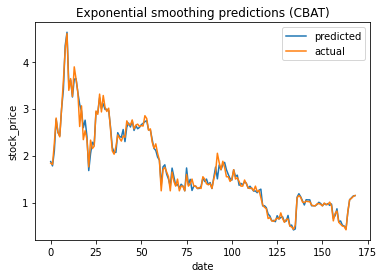

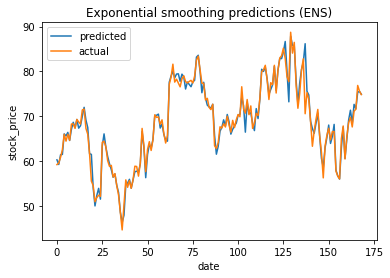

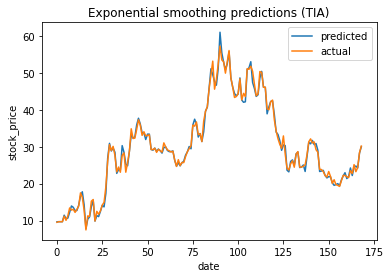

In [19]:
alpha = 0.9

all_rmse, all_mape = [], []
for header, company in zip(battery_headers, battery_companies):
    predictions, actuals = [], []

    train_window_size = 7

    for train_window_start in range(0, len(final_df), train_window_size):
        train_df = final_df.iloc[train_window_start: train_window_start + train_window_size, :]
        eval_df = final_df.iloc[min(len(final_df)-1, train_window_start + train_window_size), :]

        model = SimpleExpSmoothing(train_df[header].to_numpy(), initialization_method="estimated").fit(smoothing_level=alpha)
        predicted = model.forecast(1)
        actual = eval_df[header]
        import pdb, math
        if math.isnan(actual) or math.isnan(predicted):
            pdb.set_trace()

        predictions.append(predicted[0])
        actuals.append(actual)
        
    plt.figure()

    ax = sns.lineplot(
        x=list(range(len(predictions))),
        y=predictions,
        label='predicted'
    )

    sns.lineplot(
        x=list(range(len(actuals))),
        y=actuals,
        ax=ax,
        label='actual'
    )

    ax.set(ylabel='stock_price', xlabel='date', title=f'Exponential smoothing predictions ({company})')

    rmse = mean_squared_error(actuals, predictions, squared=False)
    mape = mean_absolute_percentage_error(actuals, predictions)
    all_rmse.append(rmse)
    all_mape.append(mape)
#         print(f'({company}) RMSE: {rmse}, MAPE: {mape}')

print(f'(alpha={alpha}): avg_rmse={np.average(all_rmse)}, avg_mape={np.average(all_mape)}')

### Create shifted dataset

In [21]:
final_df.columns

Index(['index', 'Date', 'CBAT_Bat', 'ENS_Bat', 'TIA_Bat', 'ALB_Min', 'LAC_Min',
       'SQM_Min', 'ALB_sentiment_TextBlob', 'CBAT_sentiment_TextBlob',
       'ENS_sentiment_TextBlob', 'LAC_sentiment_TextBlob',
       'SQM_sentiment_TextBlob', 'TIA_sentiment_TextBlob',
       'lithium_sentiment_TextBlob', 'ALB_1_conditions', 'LAC_1_conditions',
       'SQM_1_conditions'],
      dtype='object')

In [30]:
print(final_df["CBAT_Bat"][0:10].to_list())
print(final_df.shift(-1)["CBAT_Bat"][0:10].to_list())

[1.7999999523162842, 1.75, 1.7899999618530271, 1.9600000381469729, 1.950000047683716, 2.0, 1.8600000143051147, 1.840000033378601, 1.809999942779541, 1.7899999618530271]
[1.75, 1.7899999618530271, 1.9600000381469729, 1.950000047683716, 2.0, 1.8600000143051147, 1.840000033378601, 1.809999942779541, 1.7899999618530271, 1.830000042915344]


In [55]:
num_shift_days = 7
supervised_df = final_df.copy()

for company, header in zip(battery_companies+mining_companies, battery_headers+mining_headers):
    for shift_idx in range(1, num_shift_days):
        supervised_df[f'{header}_shift_{shift_idx}'] = final_df[header].shift(shift_idx)

    supervised_df[f'{header}_shift_label'] = final_df[header].shift(-1) # label col

supervised_df = supervised_df.dropna()
supervised_df.reset_index(inplace=True)

In [90]:
supervised_df.columns

Index(['level_0', 'index', 'Date', 'CBAT_Bat', 'ENS_Bat', 'TIA_Bat', 'ALB_Min',
       'LAC_Min', 'SQM_Min', 'ALB_sentiment_TextBlob',
       'CBAT_sentiment_TextBlob', 'ENS_sentiment_TextBlob',
       'LAC_sentiment_TextBlob', 'SQM_sentiment_TextBlob',
       'TIA_sentiment_TextBlob', 'lithium_sentiment_TextBlob',
       'ALB_1_conditions', 'LAC_1_conditions', 'SQM_1_conditions',
       'CBAT_Bat_shift_1', 'CBAT_Bat_shift_2', 'CBAT_Bat_shift_3',
       'CBAT_Bat_shift_4', 'CBAT_Bat_shift_5', 'CBAT_Bat_shift_6',
       'CBAT_Bat_shift_label', 'ENS_Bat_shift_1', 'ENS_Bat_shift_2',
       'ENS_Bat_shift_3', 'ENS_Bat_shift_4', 'ENS_Bat_shift_5',
       'ENS_Bat_shift_6', 'ENS_Bat_shift_label', 'TIA_Bat_shift_1',
       'TIA_Bat_shift_2', 'TIA_Bat_shift_3', 'TIA_Bat_shift_4',
       'TIA_Bat_shift_5', 'TIA_Bat_shift_6', 'TIA_Bat_shift_label',
       'ALB_Min_shift_1', 'ALB_Min_shift_2', 'ALB_Min_shift_3',
       'ALB_Min_shift_4', 'ALB_Min_shift_5', 'ALB_Min_shift_6',
       'ALB_Min_shift

### Stock price only

In [87]:
from copy import deepcopy
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [157]:
def run_models(models, feature_list, label_header, supervised_df, train_window_size=7):
    exepriment_X_df = supervised_df[feature_list]
    exepriment_y_df = supervised_df[label_header]

    X, y = exepriment_X_df.to_numpy(), exepriment_y_df.to_numpy()

    for model in models:
        predictions, actuals = [], []
        for train_window_start in range(0, exepriment_X_df.shape[0], train_window_size):
            X_train, y_train = X[train_window_start:train_window_start+train_window_size], y[train_window_start:train_window_start+train_window_size]

            eval_idx = train_window_start+train_window_size            
            if eval_idx >= X.shape[0]:
                break
            X_eval, y_eval = np.expand_dims(X[eval_idx], 0), y[eval_idx]

            # Train
            model.fit(X_train, y_train)

            # Predict
            predicted = model.predict(X_eval)
            actual = y_eval

            predictions.append(predicted[0])
            actuals.append(actual)

        rmse = mean_squared_error(actuals, predictions, squared=False)
        mape = mean_absolute_percentage_error(actuals, predictions)

        print(f"{model}: RMSE={rmse}, MAPE={mape}")

In [164]:
def run_models_companies(models, feature_list, supervised_df, train_window_size=7):
    for battery_company, battery_header in zip(battery_companies, battery_headers):

        invalid_battery_companies = deepcopy(battery_companies)
        invalid_battery_companies.remove(battery_company)

        current_feature_list = deepcopy(feature_list)
        for invalid_battery_company in invalid_battery_companies:
            current_feature_list = [x for x in current_feature_list if invalid_battery_company not in x]
        label_header = f'{battery_header}_shift_label'
        
        print("\nCompany:", battery_company, "\nFeature list:", current_feature_list, "Label:", label_header, "\n")
        run_models(models, current_feature_list, label_header, supervised_df, train_window_size)

In [165]:
timeseries_feature_list = [x for x in supervised_df.columns if ("_Min" in x or "_Bat" in x) and "_label" not in x]
news_feature_list = [x for x in supervised_df.columns if sentiment_suffix in x and "_label" not in x]
weather_feature_list = [x for x in supervised_df.columns if weather_suffix in x and "_label" not in x]

models = [RandomForestRegressor(), LinearRegression()]

In [166]:
feature_list = deepcopy(timeseries_feature_list)

run_models_companies(
    models = models,
    feature_list = timeseries_feature_list,
    supervised_df = supervised_df,
    train_window_size = 7
)


Company: CBAT 
Feature list: ['CBAT_Bat', 'ALB_Min', 'LAC_Min', 'SQM_Min', 'CBAT_Bat_shift_1', 'CBAT_Bat_shift_2', 'CBAT_Bat_shift_3', 'CBAT_Bat_shift_4', 'CBAT_Bat_shift_5', 'CBAT_Bat_shift_6', 'ALB_Min_shift_1', 'ALB_Min_shift_2', 'ALB_Min_shift_3', 'ALB_Min_shift_4', 'ALB_Min_shift_5', 'ALB_Min_shift_6', 'LAC_Min_shift_1', 'LAC_Min_shift_2', 'LAC_Min_shift_3', 'LAC_Min_shift_4', 'LAC_Min_shift_5', 'LAC_Min_shift_6', 'SQM_Min_shift_1', 'SQM_Min_shift_2', 'SQM_Min_shift_3', 'SQM_Min_shift_4', 'SQM_Min_shift_5', 'SQM_Min_shift_6'] Label: CBAT_Bat_shift_label 

RandomForestRegressor(): RMSE=0.11591034020743304, MAPE=4.582877420434584
LinearRegression(): RMSE=0.13692318067514375, MAPE=5.961159017700949

Company: ENS 
Feature list: ['ENS_Bat', 'ALB_Min', 'LAC_Min', 'SQM_Min', 'ENS_Bat_shift_1', 'ENS_Bat_shift_2', 'ENS_Bat_shift_3', 'ENS_Bat_shift_4', 'ENS_Bat_shift_5', 'ENS_Bat_shift_6', 'ALB_Min_shift_1', 'ALB_Min_shift_2', 'ALB_Min_shift_3', 'ALB_Min_shift_4', 'ALB_Min_shift_5', 'ALB_M

### Stock price + news

In [167]:
run_models_companies(
    models = models,
    feature_list = timeseries_feature_list + news_feature_list,
    supervised_df = supervised_df,
    train_window_size = 7
)


Company: CBAT 
Feature list: ['CBAT_Bat', 'ALB_Min', 'LAC_Min', 'SQM_Min', 'CBAT_Bat_shift_1', 'CBAT_Bat_shift_2', 'CBAT_Bat_shift_3', 'CBAT_Bat_shift_4', 'CBAT_Bat_shift_5', 'CBAT_Bat_shift_6', 'ALB_Min_shift_1', 'ALB_Min_shift_2', 'ALB_Min_shift_3', 'ALB_Min_shift_4', 'ALB_Min_shift_5', 'ALB_Min_shift_6', 'LAC_Min_shift_1', 'LAC_Min_shift_2', 'LAC_Min_shift_3', 'LAC_Min_shift_4', 'LAC_Min_shift_5', 'LAC_Min_shift_6', 'SQM_Min_shift_1', 'SQM_Min_shift_2', 'SQM_Min_shift_3', 'SQM_Min_shift_4', 'SQM_Min_shift_5', 'SQM_Min_shift_6', 'ALB_sentiment_TextBlob', 'CBAT_sentiment_TextBlob', 'LAC_sentiment_TextBlob', 'SQM_sentiment_TextBlob', 'lithium_sentiment_TextBlob'] Label: CBAT_Bat_shift_label 

RandomForestRegressor(): RMSE=0.11837101216217731, MAPE=4.807868493363557
LinearRegression(): RMSE=0.12909938286295572, MAPE=5.815203236795082

Company: ENS 
Feature list: ['ENS_Bat', 'ALB_Min', 'LAC_Min', 'SQM_Min', 'ENS_Bat_shift_1', 'ENS_Bat_shift_2', 'ENS_Bat_shift_3', 'ENS_Bat_shift_4', 'ENS

### Stock price + news + weather

In [168]:
run_models_companies(
    models = models,
    feature_list = timeseries_feature_list + news_feature_list + weather_feature_list,
    supervised_df = supervised_df,
    train_window_size = 7
)


Company: CBAT 
Feature list: ['CBAT_Bat', 'ALB_Min', 'LAC_Min', 'SQM_Min', 'CBAT_Bat_shift_1', 'CBAT_Bat_shift_2', 'CBAT_Bat_shift_3', 'CBAT_Bat_shift_4', 'CBAT_Bat_shift_5', 'CBAT_Bat_shift_6', 'ALB_Min_shift_1', 'ALB_Min_shift_2', 'ALB_Min_shift_3', 'ALB_Min_shift_4', 'ALB_Min_shift_5', 'ALB_Min_shift_6', 'LAC_Min_shift_1', 'LAC_Min_shift_2', 'LAC_Min_shift_3', 'LAC_Min_shift_4', 'LAC_Min_shift_5', 'LAC_Min_shift_6', 'SQM_Min_shift_1', 'SQM_Min_shift_2', 'SQM_Min_shift_3', 'SQM_Min_shift_4', 'SQM_Min_shift_5', 'SQM_Min_shift_6', 'ALB_sentiment_TextBlob', 'CBAT_sentiment_TextBlob', 'LAC_sentiment_TextBlob', 'SQM_sentiment_TextBlob', 'lithium_sentiment_TextBlob', 'ALB_1_conditions', 'LAC_1_conditions', 'SQM_1_conditions'] Label: CBAT_Bat_shift_label 

RandomForestRegressor(): RMSE=0.11652734833463257, MAPE=4.748624603812111
LinearRegression(): RMSE=0.12046836432834276, MAPE=5.504134300029765

Company: ENS 
Feature list: ['ENS_Bat', 'ALB_Min', 'LAC_Min', 'SQM_Min', 'ENS_Bat_shift_1', '